# Credit Card Fraud Detection

This dataset is available at <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud" target="_blank">this link</a>.

Note that the dataset is the result of a execution of a PCA (Principal Component Analysis) algorithm. Then, we do not need to do a dimensionality reduciton at first sight.

***

First of all, we read the data set:

In [1]:
import pandas as pd

df = pd.read_csv("db/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Preprocessing Steps

We need to:

- Check if there the data types are correct
- Look for missing values
- Wrong data format
- Remove unnecessary columns
- Discard duplicates

Lets start.

In [2]:
#df.first_valid_index()
#df.dtypes.value_counts()
#df.dtypes.count()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The data types seems to be ok.

***

Lets check missing values:

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are not missing values.

***

Since the data type is already correct, we will not have wrong data unless it would be outliers.

***

We can affirm that there are columns names or IDs, then we just proceed.

***

In the next step, we discard the duplicates.

In [4]:
df.drop_duplicates(inplace = True)

## Exploratory Data Analysis

In this step, we search for some possibilities that can guide us to the answer we are looking to find.

In [5]:
df["Amount"].describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

We can observe that the mean is \\$88 with standard deviation of \\$250. Note that the value that is the 3rd quantile is \\$77 and we can see that the mean value is above the it.

***

Now, we can search for a correlation between the columns.

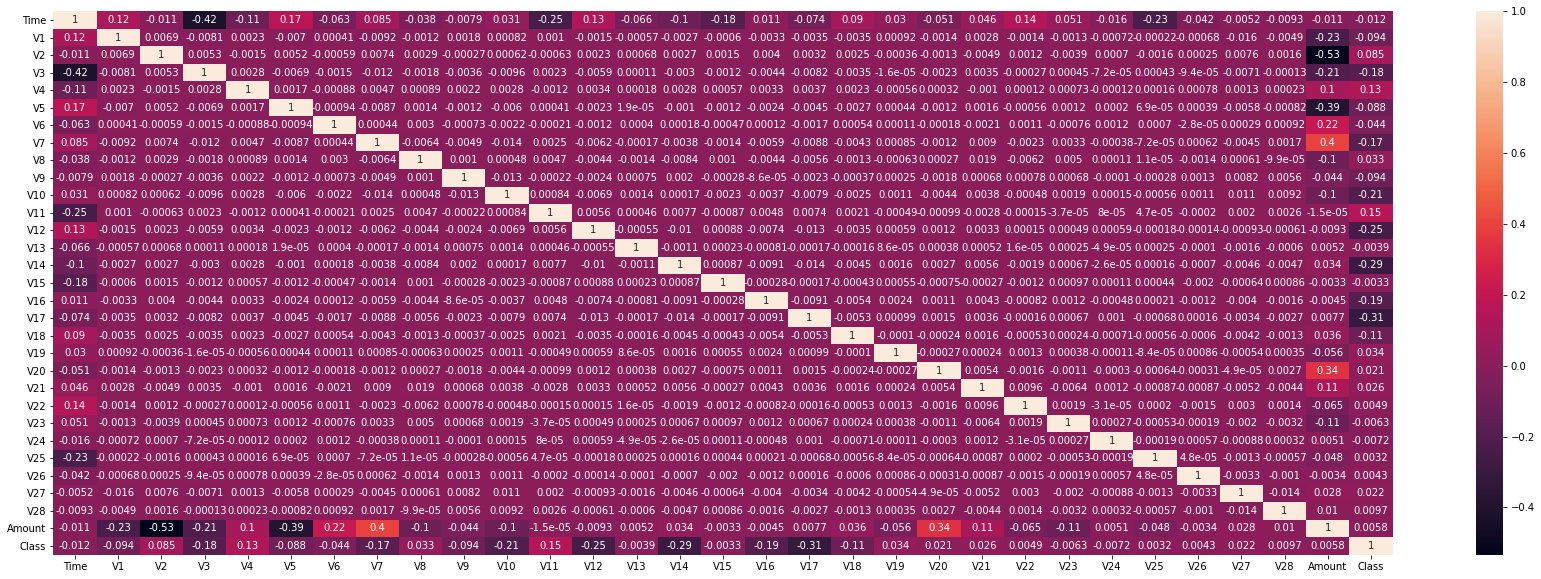

In [6]:
import seaborn as sb
import matplotlib.pyplot as plt

df_corr = df.corr()
#display(df_corr)

plt.figure(figsize = (30, 10))
sb.heatmap(df_corr, annot = True);

We can observe that the major part of the columns have a correlation value close to 0. That is expected since the columns (features) were selected by the PCA algorithm.

***

Now, we can search for outliers. This can be done using the bloxplot graphics.

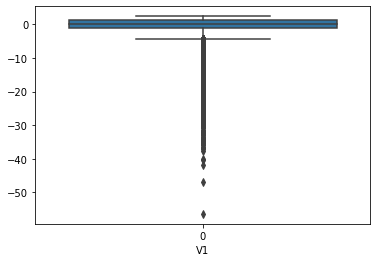

In [7]:
import matplotlib.pyplot as plt

cols = df.columns[1:2]

for col in cols:
    plt.figure()
    sb.boxplot(data = df[col])
    plt.xlabel(col)
    plt.show()

From these boxplots, we can observe that all the columns contain outliers.

***

We can see what are the distributions of the classes in this dataset.

In [8]:
prop = df["Class"].value_counts()
display(prop)
print("Ratio of the classes: {0:0.5f}".format(prop[1] / prop[0]))

0    283253
1       473
Name: Class, dtype: int64

Ratio of the classes: 0.00167


The classes are very unbalanced. The number of true transactions is 283253 and the number of fraudulent transactions is 473, the ratio is 0.0017.

***

Since we have not information regarding the major part of the columns, we can explore the relation of the column "Amount" and the classes.

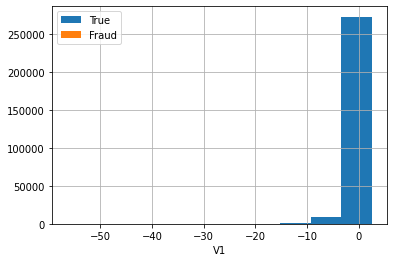

In [9]:
#df_hist = df
#df_hist["Class"] = df["Class"].replace({0 : "True", 1 : "Traud"})
df_hist = df.groupby("Class")

cols = df.columns[1:2]

for col in cols:
    plt.figure()
    df_hist[col].hist(legend = True)
    plt.xlabel(col)
    plt.legend(("True", "Fraud"))
    plt.show()

It is reasonable that there are not "Fraud" representatives on the histograms because the number of frauds is very small compared to the number of non fraudulent transactions.

## Training Models

Since the features of the dataset were selected by the PCA algorithm, we do not necessarily need to run another algorhtm to reduce dimensionality. The PCA select the features (columns) that have the major explained variance.

### Dividing the dataset

Prior to use standardize the data and use any training algorithm, we need to divide the dataset in train and test sets.

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.25, stratify = df["Class"], random_state = 42)

Then, we proceed to standardize the data.

### Standardize the data

Many machine learning algorithms are suscetible to different scales on data. We can circumvent this by standarding the data as follows.

In [11]:
from sklearn.preprocessing import StandardScaler

# initialize
scaler = StandardScaler(copy = False)

# train
df_scaled = scaler.fit(train.drop("Class", axis = 1))

# transform
train_scaled = scaler.transform(train.drop("Class", axis = 1))
test_scaled = scaler.transform(test.drop("Class", axis = 1))

Once the data is prepared, we use the dataset to train an algorithm and further predict if a transaction is fraudulent or not.

The first approach we will use is the Random Forest, as follows.

### Random Forest

In [12]:
import os
from sklearn.ensemble import RandomForestClassifier

# initialize
rf = RandomForestClassifier(n_jobs = os.cpu_count(), random_state = 42)

# train
rf.fit(train_scaled, train["Class"])

# predict
rf_pred = rf.predict(test_scaled)

There are a variety of ways to evaluate the performance of an algorithm. Among the possibilities, we will use the confusion matrix, precision and recall metrics.

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

cm = pd.DataFrame(confusion_matrix(test["Class"], rf_pred))

display(cm)
print("Accuracy: {0:1.5f}".format((cm[0][0] + cm[1][1]) / cm.sum().sum()))
print("Precision Score: {0:1.5f}".format(precision_score(test["Class"], rf_pred)))
print("Recall Score: {0:1.5f}".format(recall_score(test["Class"], rf_pred)))

,0,1
0,70809,5
1,28,90


Accuracy: 0.99953
Precision Score: 0.94737
Recall Score: 0.76271


The Random Forest model identified correctly more than 99\% of the transactions.

### Different approach

Since the classes are completely unbalanced, we can explore another approach such as the following ones.

### Isolation Forest

This approach is used to detect outliers.

In [14]:
from sklearn.ensemble import IsolationForest

# initialize
ifa = IsolationForest(n_jobs = os.cpu_count(), random_state = 42)

# train
ifa.fit(train_scaled)

# predict
ifa_pred = pd.DataFrame(ifa.predict(test_scaled))

ifa_pred.replace({1 : 0}, inplace = True)
ifa_pred.replace({-1 : 1}, inplace = True)

In [15]:
cm = pd.DataFrame(confusion_matrix(test["Class"], ifa_pred))

display(cm)
print("Accuracy: {0:1.5f}".format((cm[0][0] + cm[1][1]) / cm.sum().sum()))
print("Precision Score: {0:1.5f}".format(precision_score(test["Class"], ifa_pred)))
print("Recall Score: {0:1.5f}".format(recall_score(test["Class"], ifa_pred)))

,0,1
0,68221,2593
1,21,97


Accuracy: 0.96315
Precision Score: 0.03606
Recall Score: 0.82203


## Summary

From the approaches tested, we can observe that the number of samples in each class are very different.
There are many outliers in for each feature considered and we do not have further information to explore these outliers.
The Random Forest algorithm correctly identified more than 99\% of the types of transactions.
The Isolation Forest do not performed well.

## Further Approaches

- We may focus on well classify the true (or fraud) transactions such as analyse separately the fraudulent transactions to infer relations with the features then combine both.
- Try different classifiers (One Class SVM).
- Create an ensemble of the best classifiers.

### Analysing the fraudulent transactions separately

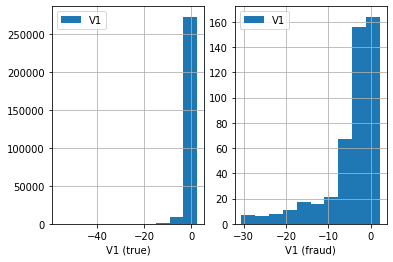

In [16]:
df_true = df[df["Class"] == 0]
df_fraud = df[df["Class"] == 1]

#cols = df_fraud.columns[1: -1]
cols = df_fraud.columns[1:2]

for col in cols:
    plt.subplot(1, 2, 1)
    df_true[col].hist(legend = True)
    plt.xlabel(col + " (true)")
    
    plt.subplot(1, 2, 2)
    df_fraud[col].hist(legend = True)
    plt.xlabel(col + " (fraud)")
    plt.show()

From these graphics, we observe that the fraudulant transaction are frequently related to the features as follows:
- V1  < ~ -1
- V2  > ~  5
- V3  < ~ -2
- V4  > ~  2.5
- V5  < ~ -2
- V6  < ~ -1
- V7  < ~ -2
- V8  > ~  5
- V9  < ~ -2
- V10 < ~  3

and so on...

### Filtering outliers and Standardize data

We will filter the outliers of each feature.

In [17]:
# Filtering outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
min_val = q1 - 1.5 * (q3 - q1)
max_val = q3 + 1.5 * (q3 - q1)

df_clean = df.copy()
for col in df_clean.columns[1:-1]:
    df_clean = df_clean.loc[df_clean[col] >= min_val[col], :]
    df_clean = df_clean.loc[df_clean[col] <= max_val[col], :]
    #print(sum(df_clean[col] < min_val[col]), sum(df_clean[col] > max_val[col]), df_clean.shape)

df_clean.reset_index()

# split dataset
train, test = train_test_split(df_clean, test_size = 0.25, stratify = df_clean["Class"])

# Standardize data
# initialize
scaler = StandardScaler(copy = True)

# train
scaler.fit(train.drop("Class", axis = 1))

# transform
train_scaled = scaler.transform(train.drop("Class", axis = 1))
test_scaled = scaler.transform(test.drop("Class", axis = 1))

### Isolation Forest

Now, we will apply the Isolation Forest in dataset clean (without outliers)

In [18]:
# initialize
ifc = IsolationForest(n_jobs = os.cpu_count(), random_state = 42)

# train
ifc.fit(train_scaled)

# predict
ifc_pred = pd.DataFrame(ifc.predict(test_scaled))
ifc_pred.replace({1: 0}, inplace = True)
ifc_pred.replace({-1: 1}, inplace = True)

# evaluate
cm = pd.DataFrame(confusion_matrix(test["Class"], ifc_pred))
display(cm)
print("Accuracy: {0:1.5f}".format((cm[0][0] + cm[1][1]) / cm.sum().sum()))
print("Precision Score: {0:1.5f}".format(precision_score(test["Class"], ifc_pred)))
print("Recall Score: {0:1.5f}".format(recall_score(test["Class"], ifc_pred)))

,0,1
0,33443,3042
1,2,2


Accuracy: 0.91658
Precision Score: 0.00066
Recall Score: 0.50000


### Pairplot

If we plot pairwisely some columns we may observe the dispersion of each type of transaction in the relationship between two variables.

We selected the first four columns and make a pairwise plot.

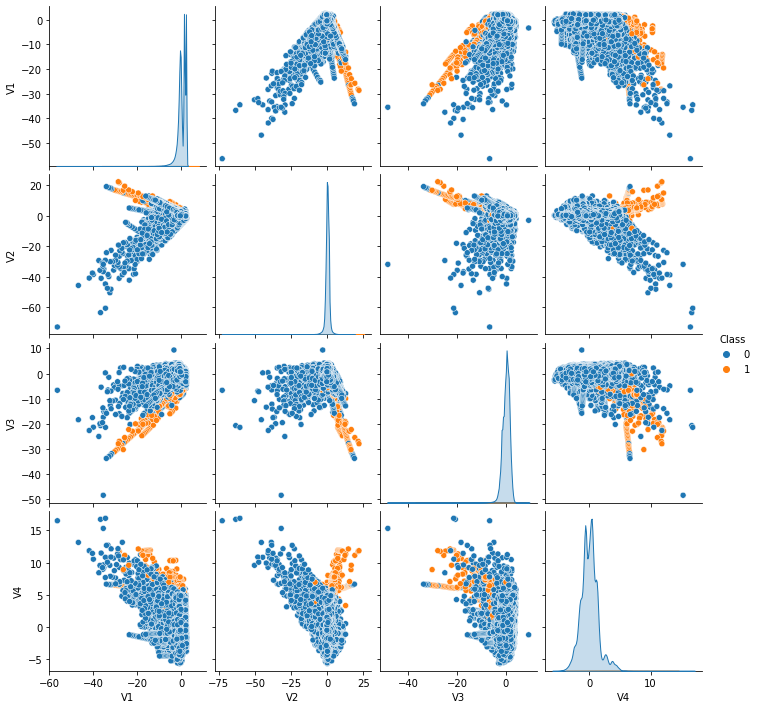

In [19]:
#import seaborn as sb

sb.pairplot(df[["V1", "V2", "V3", "V4", "Class"]], hue = "Class");

Then, we may derive some rules in order to detect fraudulent transactions. An example is v2 + v4 <= 20.